In [1]:
import os
import re
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Image Resolution
All images are *1920x1080* pixels.

In [3]:
# Path to the image folder
image_folder = '../../../datasets/images_raw/rf2/'
annotations_df = pd.read_csv('../../../datasets/images_raw/rf2/annotations.csv')

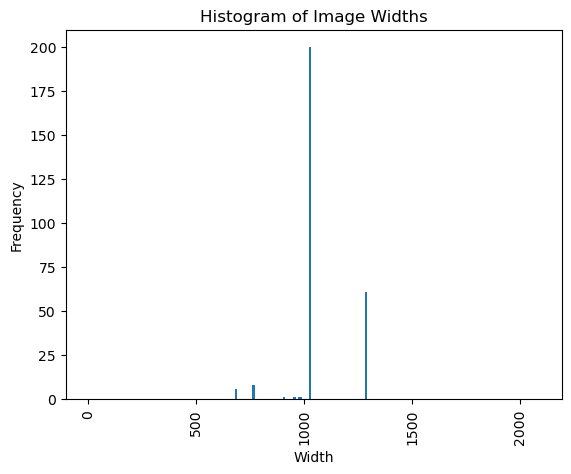

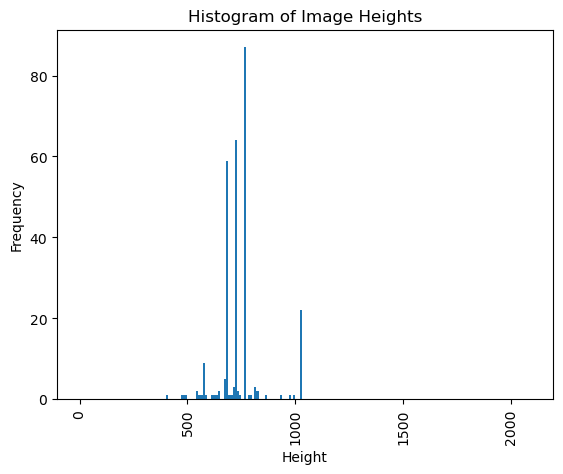

In [11]:

# Get the list of image files in the folder
image_files = [file for file in os.listdir(image_folder) if file.endswith((".jpg", ".jpeg", ".png"))]

# Initialize empty lists to store the resolutions
widths = []
heights = []

# Iterate over each image file
for file in image_files:
  # Read the image
  image_path = os.path.join(image_folder, file)
  image = cv2.imread(image_path)
  
  # Get the resolution of the image
  height, width, _ = image.shape
  
  # Append the resolution to the lists
  widths.append(width)
  heights.append(height)

# Plot histogram for width
plt.hist(widths, bins=range(0, 2100, 10))
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Image Widths')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Plot histogram for height
plt.hist(heights, bins=range(0, 2100, 10))
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Image Heights')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


# Helper Functions

In [4]:
def draw_rect(img, bboxes, color=(255, 0, 0)):
    img = img.copy()
    for bbox in bboxes:
        bbox = np.array(bbox).astype(int)
        pt1, pt2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
        img = cv2.rectangle(img, pt1, pt2, color, int(max(img.shape[:2]) / 200))
    return img

def read_img(img_id):
    img_path = f'{image_folder}{img_id}'
    img = cv2.imread(str(img_path))
    return img

def read_bboxes(img_id):
    # allows for multiple bboxes per image
    return annotations_df.loc[annotations_df.Filename == img_id, 'xmin ymin xmax ymax'.split()].values


def draw_bbox(img_id, bbox_relative=False):
    img = read_img(img_id)
    bboxes = read_bboxes(img_id)
    if bbox_relative:
        # Coordinatew from 0 to 1
        img_h, img_w, _ = img.shape
        bboxes = bboxes * np.array([img_w, img_h, img_w, img_h])
    img = draw_rect(img, bboxes)
    return img


def plot_img(img_id, bbox=False, bbox_relative=False):
    img = None
    if bbox:
        img = draw_bbox(img_id, bbox_relative)
    else:
        img = read_img(img_id)

    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb);
    
def plot_multiple_img(img_matrix_list, title_list, ncols, nrows=3, main_title=""):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=nrows, ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize = 30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        myaxes[i // ncols][i % ncols].imshow(img_rgb)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
        myaxes[i // ncols][i % ncols].grid(False)
        myaxes[i // ncols][i % ncols].set_xticks([])
        myaxes[i // ncols][i % ncols].set_yticks([])

    plt.show()

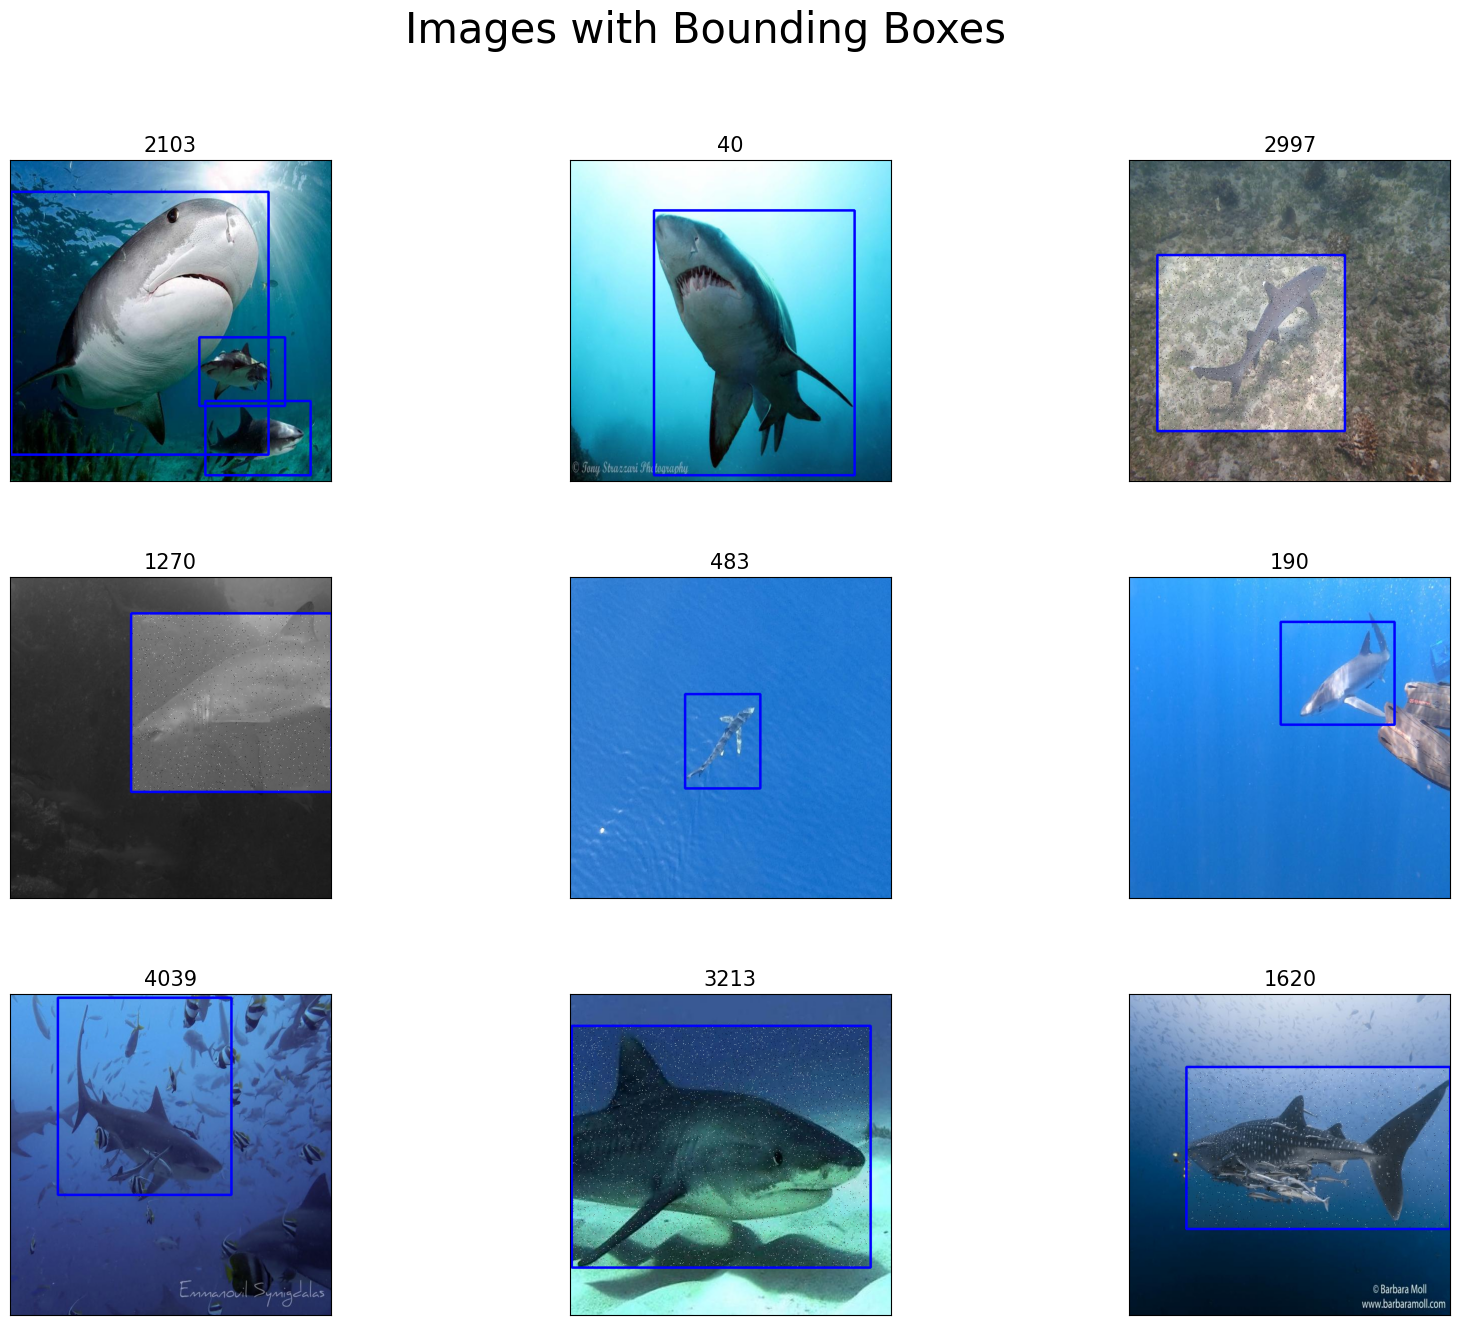

In [5]:
import random
all_images = os.listdir(image_folder)

img = 'rf3_BR1_Full_mp4-6403_jpg.rf.942a84f4ca28690cdb4b2179ab75e285.jpg'

sample = random.sample(range(len(all_images)), 9)

plot_multiple_img(
  [draw_bbox(all_images[i], bbox_relative=True) for i in sample],
  [str(s) for s in sample],
  ncols=3,
  nrows=3,
  main_title="Images with Bounding Boxes"
)

In [20]:
all_images[62]

'b8ea8ab0eec11b3e.jpg'

In [60]:
from PIL import Image
import albumentations as A
from collections import namedtuple
from albumentations.pytorch.transforms import ToTensorV2

import matplotlib.pyplot as plt
import matplotlib.patches as patches

ModuleNotFoundError: No module named 'torch'